In [7]:
#import primary modules
import pandas as pd 
import numpy as np 
#import matplotlib & inline
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
#import seaborn 
import seaborn as sns

In [8]:
#data read into a pandas dataframe 
#The dataset contains students performance and status. The data presents gender, race, parental level of education lunch and preparation of student.
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
#Checking data types and no nulls are found
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#view the top 5 rows of the dataset 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#view column names 
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

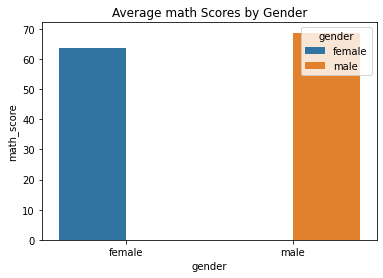

In [23]:
#now lets analyze and visualize the data
new_df = df.groupby(['gender'])['math score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'math score', hue = 'gender', data=new_df)
plt.xlabel('gender')
plt.ylabel('math_score')
plt.title('Average math Scores by Gender') 

plt.show()

#graph shows Male student received higher average math score compare to female students

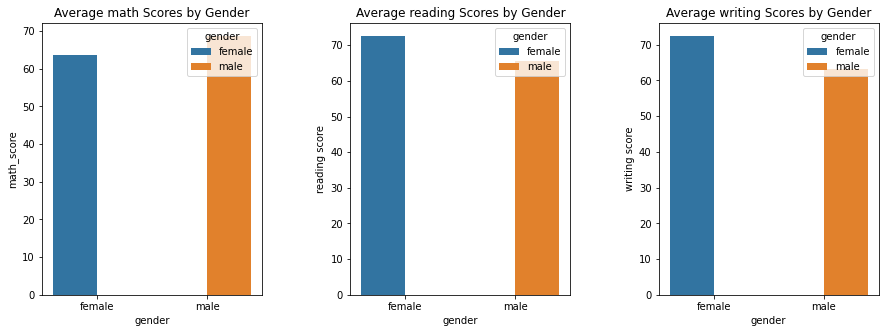

In [24]:
#let's compare other subjects other than math
#create new dataframe of group by gender and compare average score per subject
fig = plt.figure(figsize = (15,5))

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot (1, 3, 2)
ax2 = fig.add_subplot (1, 3, 3)
#adding space between each graphs
plt.subplots_adjust(wspace = 0.4)

#subplot1 : math score 
new_df = df.groupby(['gender'])['math score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'math score', hue = 'gender', data=new_df, ax=ax0)
ax0.set_xlabel('gender')
ax0.set_ylabel('math_score')
ax0.set_title('Average math Scores by Gender') 

#subplot2 : reading score
new_df1 = df.groupby(['gender'])['reading score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'reading score', hue = 'gender', data=new_df1, ax=ax1)
ax1.set_xlabel('gender')
ax1.set_ylabel('reading score')
ax1.set_title('Average reading Scores by Gender') 

#subplot3: writing score
new_df2 = df.groupby(['gender'])['writing score'].mean().reset_index()
sns.barplot( x = 'gender', y = 'writing score', hue = 'gender', data=new_df2, ax=ax2)
ax2.set_xlabel('gender')
ax2.set_ylabel('writing score')
ax2.set_title('Average writing Scores by Gender') 

plt.show()

#graphs shows that male students received higher score in math, but lower in reading and writing compare to female students

In [26]:
#adding total score column for easier plotting

total_score = df['reading score']+ df['math score']+ df['writing score']
total_ave_score = total_score / 3 
total_ave_score

df['total score'] = round(total_ave_score, 1)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


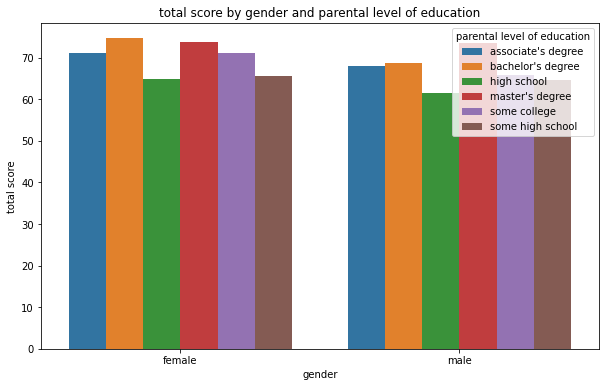

In [27]:
#let's find out if parental level of education has an effect on their child's performance in study
df_df = df.groupby(['parental level of education', 'gender'])['total score'].mean().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(x='gender', y='total score', hue = 'parental level of education', data=df_df)
plt.xlabel('gender')
plt.ylabel('total score')
plt.title('total score by gender and parental level of education')
plt.show()

In [ ]:
#graph shows that parental level of education has an effect on their child's performance for both genders
#but for female students, parents who had bachelor's degree received higher average score compare to parents with master's degree

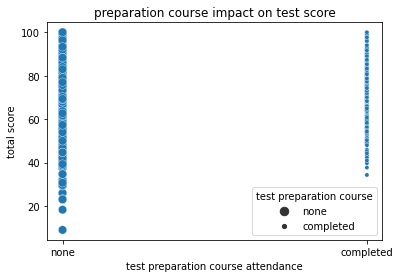

                               mean      median         std
                        total score total score total score
test preparation course                                    
completed                 72.669553        73.5   13.038673
none                      65.037539        65.3   14.185340


In [43]:
#let's find out if preparation course has any relationship between test score
size = df['test preparation course']
sns.scatterplot(data = df, x = 'test preparation course', y = 'total score', size = size)
plt.xlabel('test preparation course attendance')
plt.ylabel('total score')
plt.title('preparation course impact on test score')
plt.show()

pivot_table = df.pivot_table(index='test preparation course', values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)
#graph presents students with no preparation course received significantly lower test score compare to students who completed 
#preparation course

                    mean      median         std
             total score total score total score
lunch                                           
free/reduced   62.198310        62.7   14.457969
standard       70.836279        71.3   13.186544


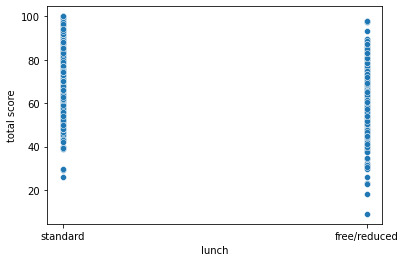

In [40]:
# what about lunch? 
sns.scatterplot(data = df, x = 'lunch' , y = 'total score')
#graph shows that student who had standard lunch received significant higher total score compare to student with free/reduced lunch
pivot_table = df.pivot_table(index='lunch', values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)

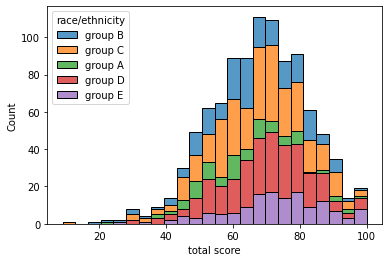

                      mean      median         std
               total score total score total score
race/ethnicity                                    
group A          62.988764        61.3   14.448902
group B          65.470000        65.0   14.733527
group C          67.130721        68.3   13.871086
group D          69.179389        70.0   13.250497
group E          72.748571        73.5   14.566605


In [41]:
#how ethnicity effects on total score?
sns.histplot(data= df, x = 'total score', hue = 'race/ethnicity', multiple='stack')
plt.show()

# graph shows almsot evenly spread for each ethniciticy, but we can clearly observe that Group E have higher presence in the upper 
# score compare to other groups

#statistic table
pivot_table = df.pivot_table(index='race/ethnicity', values='total score', aggfunc=['mean', 'median', 'std'])
print(pivot_table)

<AxesSubplot:xlabel='race/ethnicity', ylabel='total score'>

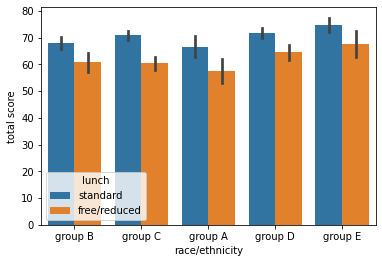

In [42]:
#bar plot of ethnicity and lunch together

sns.barplot(x='race/ethnicity', y='total score', hue = 'lunch', data=df)

# this graph clearly shows that students with standard lunch received higher score students with free/reduced lunch for every group 
# Group E received distinctly high score compare to other groups, and rest of the groups received similar average scores.